In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import normalize

def loadFiles(path):
    furhat_files = []
    
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            src = filename
            furhat_files.append(src)
            
    return furhat_files

def returnFileGroup(lookup,furhat_pos_name):
    row = lookup[lookup['furhat_pose']==furhat_pos_name]
    fur = pd.read_csv('video_log_labels/furhat_csvs/'+row['furhat_pose'].tolist()[0])
    part = pd.read_csv('video_log_labels/participant_video_csvs/'+row['participant_pose'].tolist()[0])
    spee = pd.read_csv('video_log_labels/speech_csvs/'+row['speech'].tolist()[0])
    fs = pd.read_csv('video_log_labels/furhat_speech_csvs/'+row['furhat_speech'].tolist()[0])
    print('video_log_labels/participant_video_csvs/'+row['participant_pose'].tolist()[0])
    return fur, fs, part, spee

def matchTime(furhatpose, furhatspeech, particip, transc):
    try:
        time_video = float(transc[transc['DisplayText'].str.contains('Vad heter du och')]['Offset'].tolist()[0])
        time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Vad heter du')]['timestamp'].tolist()[0])
    except:
        try:
            time_video = float(transc[transc['DisplayText'].str.contains('Trevligt att')]['Offset'].tolist()[0])
            time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Trevligt att')]['timestamp'].tolist()[0])
        except:
            try:
                time_video = float(transc[transc['DisplayText'].str.contains('vad heter du?')]['Offset'].tolist()[0])
                time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Vad heter du')]['timestamp'].tolist()[0])
            except:
                time_video = float(transc[transc['DisplayText'].str.contains('Vad gör du och')]['Offset'].tolist()[0])
                time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Vad heter du')]['timestamp'].tolist()[0])
    print('video matched at '+str(time_video)+' to log at '+str(time_log))
    #hard coded with 5455
    #time_log = -1.013525
    #video_log = 28.147
    furhatspeech['timestamp'] = furhatspeech['timestamp'].astype(float)-time_log
    furhatpose['timestamp'] = furhatpose['timestamp']-time_log
    particip['time_elapsed (s)'] = particip['time_elapsed (s)']-time_video
    #print(particip)
    #particip.columns = 
    transc['Offset'] = transc['Offset'].astype(float)-time_video
    return furhatpose, furhatspeech, particip, transc, time_video


In [70]:
file_idx = 26 #choose index between 1 and 26 (not 7 because there is no 38 video) #18 #8 #10 #24 
speech = loadFiles('video_log_labels/speech_csvs/')
furhat = loadFiles('video_log_labels/furhat_csvs/')
furhat_speech = loadFiles('video_log_labels/furhat_speech_csvs/')
lookup = pd.DataFrame(pd.read_excel('video_log_labels/log_lookup.xlsx'))
print('analyzing ',furhat[file_idx])
furhat_pose, furhat_speech, participant, transcribe = returnFileGroup(lookup,furhat[file_idx])
#print(transcribe[['Offset','DisplayText']])
#print(participant[['time_elapsed (s)','left angle horizontal']])
#print(furhat_speech)
fp_adj, fs_adj, p_adj, t_adj, time_video_offset = matchTime(pd.DataFrame(furhat_pose), pd.DataFrame(furhat_speech).astype(str), pd.DataFrame(participant), pd.DataFrame(transcribe).astype(str))
#change aversion to straight
for i in range(len(fp_adj.index)):
    #print(fp_adj['y_pos'].iloc[i])
    if fp_adj['y_pos'].iloc[i]==0.5899999737739563:
        fp_adj['side'].iloc[i]='aversion'
#     if fp_adj['side'].iloc[i]=='Right':
#         fp_adj['side'].iloc[i]='Left'
#     if fp_adj['side'].iloc[i]=='Left':
#         fp_adj['side'].iloc[i]='Right'
# print(fp_adj)
# print(fs_adj)

analyzing  Sep-30-2020_17-29-22_control_092_Furhat.csv
video_log_labels/participant_video_csvs/9-30-2020-Furhat__9293.csv
video matched at 127.77 to log at 16.701595544815063


C:\Users\Catherine\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [25]:
data = pd.read_csv('video_log_labels/92_annotations.txt', sep='\t', header = None)
data.columns = ['gaze_subject', 'ignore','ignore2', 'begin_time','ignore4','end_time', 'ignore6', 'duration','gaze_object']
data = data.drop(['ignore','ignore2', 'ignore4','ignore6'],1)
data['encoded'] = np.where(data['gaze_object'] == 'Robot', 1, np.where(data['gaze_object'] == 'Other', -1, 0))
data['begin_time'] = data['begin_time'] - time_video_offset
data['end_time'] = data['end_time'] - time_video_offset
print(data)

    gaze_subject  begin_time  end_time  duration gaze_object  encoded
0     GazeOfLeft     -17.205   -12.875     4.330       Robot        1
1     GazeOfLeft     -12.865   -12.105     0.760       Other       -1
2     GazeOfLeft     -12.090    -7.510     4.580       Robot        1
3     GazeOfLeft      -7.505    -6.895     0.610       Other       -1
4     GazeOfLeft      -6.895    -3.465     3.430       Robot        1
5     GazeOfLeft      -3.465    -2.935     0.530       Other       -1
6     GazeOfLeft      -2.935     8.640    11.575       Robot        1
7     GazeOfLeft       8.640     9.260     0.620       Robot        1
8     GazeOfLeft       9.275    10.345     1.070      Tablet        0
9     GazeOfLeft      10.355    17.175     6.820       Robot        1
10    GazeOfLeft      17.175    17.910     0.735       Other       -1
11    GazeOfLeft      17.910    23.445     5.535       Robot        1
12    GazeOfLeft      23.445    24.280     0.835      Tablet        0
13    GazeOfLeft    

In [26]:
left = data[data['gaze_subject']=='GazeOfRight']
left_robot_dur = left[left['gaze_object']=='Robot']['duration'].sum()
print(left_robot_dur)
left_other_dur = left[left['gaze_object']=='Other']['duration'].sum()
print(left_other_dur)
left_tablet_dur = left[left['gaze_object']=='Tablet']['duration'].sum()
print(left_tablet_dur)

415.44000000000005
68.65
487.76


In [27]:
right = data[data['gaze_subject']=='GazeOfLeft']
right_robot_dur = right[right['gaze_object']=='Robot']['duration'].sum()
print(right_robot_dur)
right_other_dur = right[right['gaze_object']=='Other']['duration'].sum()
print(right_other_dur)
right_tablet_dur = right[right['gaze_object']=='Tablet']['duration'].sum()
print(right_tablet_dur)

334.80499999999995
233.81499999999997
381.00000000000006


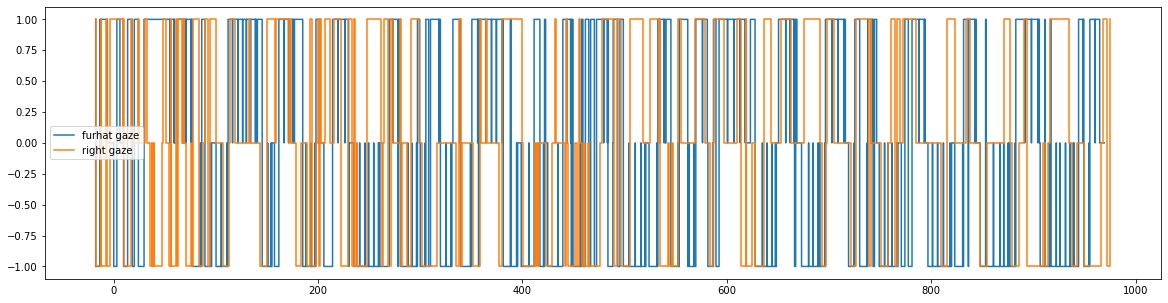

In [28]:
plt.figure(0,figsize=(20,5))
#print(fp_adj)
fp_adj['right_encoded'] = np.where(fp_adj['side'] == 'right', 1, np.where(fp_adj['side'] == 'left', -1, 0))
furhat_pose = np.array(fp_adj)
plt.step(furhat_pose[:,1],fp_adj['right_encoded'],label = 'furhat gaze')
plt.step(np.array(right['begin_time']),np.array(right['encoded']),label='right gaze')
#plt.step(np.array(left['begin_time']),np.array(left['encoded']),label='left gaze')
plt.legend()

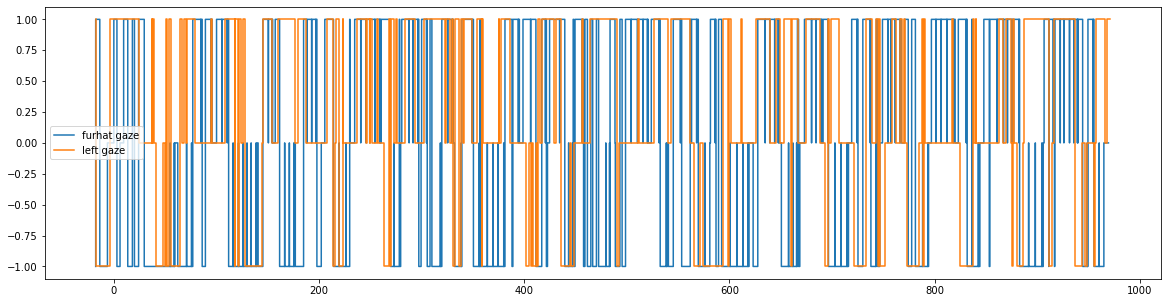

In [30]:
plt.figure(0,figsize=(20,5))
fp_adj['left_encoded'] = np.where(fp_adj['side'] == 'right', -1, np.where(fp_adj['side'] == 'left', 1, 0))
furhat_pose = np.array(fp_adj)
plt.step(furhat_pose[:,1],fp_adj['left_encoded'],label = 'furhat gaze')
#plt.step(np.array(right['begin_time']),np.array(right['encoded']),label='right gaze')
plt.step(np.array(left['begin_time']),np.array(left['encoded']),label='left gaze')
plt.legend()

In [69]:
from tqdm import tqdm
times = np.arange(0,969,.1)
furhat_by_time = []
change_dir_count = 0
for time in tqdm(times):
    for row in range(len(fp_adj.index)-1):
        if (time >= fp_adj['timestamp'].iloc[row]) & (time <= fp_adj['timestamp'].iloc[row+1]):
            furhat_by_time.append([time,fp_adj['x_pos'].iloc[row],fp_adj['y_pos'].iloc[row],fp_adj['side'].iloc[row],fp_adj['left_encoded'].iloc[row],fp_adj['right_encoded'].iloc[row]])

for row in range(len(fp_adj.index)-1):
    if fp_adj['side'].iloc[row] != fp_adj['side'].iloc[row-1]:
        change_dir_count += 1
        
furhat_by_time = pd.DataFrame(furhat_by_time)
furhat_by_time.columns = ['time','x_pos','y_pos','side','left_encoded','right_encoded']
#furhat_by_time = right_by_time.drop('ignore',1)
print(furhat_by_time)     
print(change_dir_count/968.9*60)
print(change_dir_count)

100%|██████████████████████████████████████████████████████████████████████████████| 9690/9690 [03:18<00:00, 48.72it/s]


       time  x_pos   y_pos      side  left_encoded  right_encoded
0       0.0  0.000  0.2000  straight             0              0
1       0.1  0.000  0.2000  straight             0              0
2       0.2  0.000  0.2000  straight             0              0
3       0.3  0.000  0.2000  straight             0              0
4       0.4  0.000  0.2000  straight             0              0
5       0.5  0.000  0.2000  straight             0              0
6       0.6  0.000  0.2000  straight             0              0
7       0.7  0.000  0.2000  straight             0              0
8       0.8  0.000  0.2000  straight             0              0
9       0.9  0.000  0.2000  straight             0              0
10      1.0  0.000  0.2000  straight             0              0
11      1.1  0.000  0.2000  straight             0              0
12      1.2  0.000  0.2000  straight             0              0
13      1.3  0.000  0.2000  straight             0              0
14      1.

In [59]:
#proportion of furhat gaze
left_time = furhat_by_time[furhat_by_time['side']=='left']['side'].count()
right_time = furhat_by_time[furhat_by_time['side']=='right']['side'].count()
straight_time = furhat_by_time[furhat_by_time['side']=='straight']['side'].count()
aversion_time = furhat_by_time[furhat_by_time['side']=='aversion']['side'].count()
print(left_time/(left_time+right_time+straight_time+aversion_time))
print(right_time/(left_time+right_time+straight_time+aversion_time))
print(straight_time/(left_time+right_time+straight_time+aversion_time))
print(aversion_time/(left_time+right_time+straight_time+aversion_time))

0.3544891640866873
0.3287925696594427
0.1957688338493292
0.12094943240454076


In [60]:
from tqdm import tqdm
print(right)
times = np.arange(0,980,.1)
right_by_time = []
change_dir_count = 0
for time in tqdm(times):
    for row in range(len(right.index)):
        if (time >= right['begin_time'].iloc[row]) & (time <= right['end_time'].iloc[row]):
            right_by_time.append([time,right['gaze_object'].iloc[row],right['encoded'].iloc[row]])
right_by_time = pd.DataFrame(right_by_time)
right_by_time.columns = ['time','gaze_object','encoded']


count = 0            
change_per_min = []           
for row in range(len(right_by_time.index)):
    print(right_by_time['time'].iloc[row])
    if right_by_time['time'].iloc[row] % 60.0 == 0.0:
        change_per_min.append(count)
        print("right_by_time['time'] % 60.0")
        count = 0
    if right_by_time['gaze_object'].iloc[row] != right_by_time['gaze_object'].iloc[row-1]:
        count+=1
        change_dir_count += 1
            
#right_by_time = right_by_time.drop('ignore',1)
#print(right_by_time)
print(change_dir_count/980.200*60)

  0%|                                                                               | 14/9800 [00:00<01:15, 128.78it/s]

    gaze_subject  begin_time  end_time  duration gaze_object  encoded
0     GazeOfLeft     -17.205   -12.875     4.330       Robot        1
1     GazeOfLeft     -12.865   -12.105     0.760       Other       -1
2     GazeOfLeft     -12.090    -7.510     4.580       Robot        1
3     GazeOfLeft      -7.505    -6.895     0.610       Other       -1
4     GazeOfLeft      -6.895    -3.465     3.430       Robot        1
5     GazeOfLeft      -3.465    -2.935     0.530       Other       -1
6     GazeOfLeft      -2.935     8.640    11.575       Robot        1
7     GazeOfLeft       8.640     9.260     0.620       Robot        1
8     GazeOfLeft       9.275    10.345     1.070      Tablet        0
9     GazeOfLeft      10.355    17.175     6.820       Robot        1
10    GazeOfLeft      17.175    17.910     0.735       Other       -1
11    GazeOfLeft      17.910    23.445     5.535       Robot        1
12    GazeOfLeft      23.445    24.280     0.835      Tablet        0
13    GazeOfLeft    

100%|█████████████████████████████████████████████████████████████████████████████| 9800/9800 [00:52<00:00, 185.06it/s]


0.0
right_by_time['time'] % 60.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.800000000000001
4.9
5.0
5.1000000000000005
5.2
5.300000000000001
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.9
6.0
6.1000000000000005
6.2
6.300000000000001
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.0
7.1000000000000005
7.2
7.300000000000001
7.4
7.5
7.6000000000000005
7.7
7.800000000000001
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.700000000000001
8.8
8.9
9.0
9.1
9.200000000000001
9.3
9.4
9.5
9.600000000000001
9.700000000000001
9.8
9.9
10.0
10.100000000000001
10.200000000000001
10.3
10.4
10.5

137.8
137.9
138.0
138.1
138.20000000000002
138.3
138.4
138.5
138.6
138.70000000000002
138.8
138.9
139.0
139.1
139.20000000000002
139.3
139.4
139.5
139.6
139.70000000000002
139.8
139.9
140.0
140.1
140.20000000000002
140.3
140.4
140.5
140.6
140.70000000000002
140.8
140.9
141.0
141.1
141.20000000000002
141.3
141.4
141.5
141.6
141.70000000000002
141.8
141.9
142.0
142.1
142.20000000000002
142.3
142.4
142.5
142.6
142.70000000000002
142.8
142.9
143.0
143.1
143.20000000000002
143.3
143.4
143.5
143.6
143.70000000000002
143.8
143.9
144.0
144.1
144.20000000000002
144.3
144.4
144.5
144.6
144.70000000000002
144.8
144.9
145.0
145.1
145.20000000000002
145.3
145.4
145.5
145.6
145.70000000000002
145.8
145.9
146.0
146.1
146.20000000000002
146.3
146.4
146.5
146.6
146.70000000000002
146.8
146.9
147.0
147.1
147.20000000000002
147.3
147.4
147.5
147.6
147.70000000000002
147.8
147.9
148.0
148.1
148.20000000000002
148.3
148.4
148.5
148.6
148.70000000000002
148.8
148.9
149.0
149.1
149.20000000000002
149.3
149.4

266.8
266.90000000000003
267.0
267.1
267.2
267.3
267.40000000000003
267.5
267.6
267.7
267.8
267.90000000000003
268.0
268.1
268.2
268.3
268.40000000000003
268.5
268.6
268.7
268.8
268.90000000000003
269.0
269.1
269.2
269.3
269.40000000000003
269.5
269.6
269.7
269.8
269.90000000000003
270.0
270.1
270.2
270.3
270.40000000000003
270.5
270.6
270.7
270.8
270.90000000000003
271.0
271.1
271.2
271.3
271.40000000000003
271.5
271.6
271.7
271.8
271.90000000000003
272.0
272.1
272.2
272.3
272.40000000000003
272.5
272.6
272.7
272.8
272.90000000000003
273.0
273.1
273.2
273.3
273.40000000000003
273.5
273.6
273.7
273.8
273.90000000000003
274.0
274.1
274.2
274.3
274.40000000000003
274.5
274.6
274.7
274.8
274.90000000000003
275.0
275.1
275.2
275.3
275.40000000000003
275.5
275.6
275.7
275.8
275.90000000000003
276.0
276.1
276.2
276.3
276.40000000000003
276.5
276.6
276.7
276.8
276.90000000000003
277.0
277.1
277.2
277.3
277.40000000000003
277.5
277.6
277.7
277.8
277.90000000000003
278.0
278.1
278.2
278.3
278.4

366.90000000000003
367.0
367.1
367.20000000000005
367.3
367.40000000000003
367.5
367.6
367.70000000000005
367.8
367.90000000000003
368.0
368.1
368.20000000000005
368.3
368.40000000000003
368.5
368.6
368.70000000000005
368.8
368.90000000000003
369.0
369.1
369.20000000000005
369.3
369.40000000000003
369.5
369.6
369.70000000000005
369.8
369.90000000000003
370.0
370.1
370.20000000000005
370.3
370.40000000000003
370.5
370.6
370.70000000000005
370.8
370.90000000000003
371.0
371.1
371.20000000000005
371.3
371.40000000000003
371.5
371.6
371.70000000000005
371.8
371.90000000000003
372.0
372.1
372.20000000000005
372.3
372.40000000000003
372.5
372.6
372.70000000000005
372.8
372.90000000000003
373.0
373.1
373.20000000000005
373.3
373.40000000000003
373.5
373.6
373.70000000000005
373.8
373.90000000000003
374.0
374.1
374.20000000000005
374.3
374.40000000000003
374.5
374.6
374.70000000000005
374.8
374.90000000000003
375.0
375.1
375.20000000000005
375.3
375.40000000000003
375.5
375.6
375.7000000000000

461.0
461.1
461.20000000000005
461.3
461.40000000000003
461.5
461.6
461.70000000000005
461.8
461.90000000000003
462.0
462.1
462.20000000000005
462.3
462.40000000000003
462.5
462.6
462.70000000000005
462.8
462.90000000000003
463.0
463.1
463.20000000000005
463.3
463.40000000000003
463.5
463.6
463.70000000000005
463.8
463.90000000000003
464.0
464.1
464.20000000000005
464.3
464.40000000000003
464.5
464.6
464.70000000000005
464.8
464.90000000000003
465.0
465.1
465.20000000000005
465.3
465.40000000000003
465.5
465.6
465.70000000000005
465.8
465.90000000000003
466.0
466.1
466.20000000000005
466.3
466.40000000000003
466.5
466.6
466.70000000000005
466.8
466.90000000000003
467.0
467.1
467.20000000000005
467.3
467.40000000000003
467.5
467.6
467.70000000000005
467.8
467.90000000000003
468.0
468.1
468.20000000000005
468.3
468.40000000000003
468.5
468.6
468.70000000000005
468.8
468.90000000000003
469.0
469.1
469.20000000000005
469.3
469.40000000000003
469.5
469.6
469.70000000000005
469.8
469.9000000

578.4
578.5
578.6
578.7
578.8000000000001
578.9
579.0
579.1
579.2
579.3000000000001
579.4
579.5
579.6
579.7
579.8000000000001
579.9
580.0
580.1
580.2
580.3000000000001
580.4
580.5
580.6
580.7
580.8000000000001
580.9
581.0
581.1
581.2
581.3000000000001
581.4
581.5
581.6
581.7
581.8000000000001
581.9
582.0
582.1
582.2
582.3000000000001
582.4
582.5
582.6
582.7
582.8000000000001
582.9
583.0
583.1
583.2
583.3000000000001
583.5
583.6
583.7
583.8000000000001
583.9
584.0
584.1
584.2
584.3000000000001
584.4
584.5
584.6
584.7
584.8000000000001
584.9
585.0
585.1
585.2
585.3000000000001
585.4
585.5
585.6
585.7
585.8000000000001
585.9
586.0
586.1
586.2
586.3000000000001
586.4
586.5
586.6
586.7
586.8000000000001
586.9
587.0
587.1
587.2
587.3000000000001
587.4
587.5
587.6
587.7
587.8000000000001
587.9
588.0
588.1
588.2
588.3000000000001
588.4
588.5
588.6
588.7
588.8000000000001
588.9
589.0
589.1
589.2
589.3000000000001
589.4
589.5
589.6
589.7
589.8000000000001
589.9
590.0
590.1
590.2
590.300000000000

662.9000000000001
663.0
663.1
663.2
663.3000000000001
663.4000000000001
663.5
663.6
663.7
663.8000000000001
663.9000000000001
664.0
664.1
664.2
664.3000000000001
664.4000000000001
664.5
664.6
664.7
664.8000000000001
664.9000000000001
665.0
665.1
665.2
665.3000000000001
665.4000000000001
665.5
665.6
665.7
665.8000000000001
665.9000000000001
666.0
666.1
666.2
666.3000000000001
666.4000000000001
666.5
666.6
666.7
666.8000000000001
666.9000000000001
667.0
667.1
667.2
667.3000000000001
667.4000000000001
667.5
667.6
667.7
667.8000000000001
667.9000000000001
668.0
668.1
668.2
668.3000000000001
668.4000000000001
668.5
668.6
668.7
668.8000000000001
668.9000000000001
669.0
669.1
669.2
669.3000000000001
669.4000000000001
669.5
669.6
669.7
669.8000000000001
669.9000000000001
670.0
670.1
670.2
670.3000000000001
670.4000000000001
670.5
670.6
670.7
670.8000000000001
670.9000000000001
671.0
671.1
671.2
671.3000000000001
671.4000000000001
671.5
671.6
671.7
671.8000000000001
671.9000000000001
672.0
672.

788.5
788.6
788.7
788.8000000000001
788.9000000000001
789.0
789.1
789.2
789.3000000000001
789.4000000000001
789.5
789.6
789.7
789.8000000000001
789.9000000000001
790.0
790.1
790.2
790.3000000000001
790.4000000000001
790.5
790.6
790.7
790.8000000000001
790.9000000000001
791.0
791.1
791.2
791.3000000000001
791.4000000000001
791.5
791.6
791.7
791.8000000000001
791.9000000000001
792.0
792.1
792.2
792.3000000000001
792.4000000000001
792.5
792.6
792.7
792.8000000000001
792.9000000000001
793.0
793.1
793.2
793.3000000000001
793.4000000000001
793.5
793.6
793.7
793.8000000000001
793.9000000000001
794.0
794.1
794.2
794.3000000000001
794.4000000000001
794.5
794.6
794.7
794.8000000000001
794.9000000000001
795.0
795.1
795.2
795.3000000000001
795.4000000000001
795.5
795.6
795.7
795.8000000000001
795.9000000000001
796.0
796.1
796.2
796.3000000000001
796.4000000000001
796.5
796.6
796.7
796.8000000000001
796.9000000000001
797.0
797.1
797.2
797.3000000000001
797.4000000000001
797.5
797.6
797.7
797.800000

916.7
916.8000000000001
916.9000000000001
917.0
917.1
917.2
917.3000000000001
917.4000000000001
917.5
917.6
917.7
917.8000000000001
917.9000000000001
918.0
918.1
918.2
918.3000000000001
918.4000000000001
918.5
918.6
918.7
918.8000000000001
918.9000000000001
919.0
919.1
919.2
919.3000000000001
919.4000000000001
919.5
919.6
919.7
919.8000000000001
919.9000000000001
920.0
920.1
920.2
920.3000000000001
920.4000000000001
920.5
920.6
920.7
920.8000000000001
920.9000000000001
921.0
921.1
921.2
921.3000000000001
921.4000000000001
921.5
921.6
921.7
921.8000000000001
921.9000000000001
922.0
922.1
922.2
922.3000000000001
922.4000000000001
922.5
922.6
922.7
922.8000000000001
922.9000000000001
923.0
923.1
923.2
923.3000000000001
923.4000000000001
923.5
923.6
923.7
923.8000000000001
923.9000000000001
924.0
924.1
924.2
924.3000000000001
924.4000000000001
924.5
924.6
924.7
924.8000000000001
924.9000000000001
925.0
925.1
925.2
925.3000000000001
925.4000000000001
925.5
925.6
925.7
925.8000000000001
925.

In [61]:
print(np.std(change_per_min[1:]))

4.815340071064556


In [55]:
from tqdm import tqdm
print(left)
times = np.arange(0,980,.1)
left_by_time = []
change_dir_count = 0
for time in tqdm(times):
    for row in range(len(left.index)):
        if (time >= left['begin_time'].iloc[row]) & (time <= left['end_time'].iloc[row]):
            left_by_time.append([time,left['gaze_object'].iloc[row],left['encoded'].iloc[row]])
            
left_by_time = pd.DataFrame(left_by_time)
left_by_time.columns = ['time','gaze_object','encoded']

count = 0            
change_per_min = []           
for row in range(len(left_by_time.index)):
    #print(left_by_time['time'].iloc[row])
    if left_by_time['time'].iloc[row] % 60.0 == 0.0:
        change_per_min.append(count)
        #print("right_by_time['time'] % 60.0")
        count = 0
    if left_by_time['gaze_object'].iloc[row] != left_by_time['gaze_object'].iloc[row-1]:
        count+=1
        change_dir_count += 1
#left_by_time = left_by_time.drop('ignore',1)
print(left_by_time)
print(change_dir_count/980.570*60)

  0%|                                                                               | 15/9800 [00:00<01:06, 147.41it/s]

    gaze_subject  begin_time  end_time  duration gaze_object  encoded
221  GazeOfRight     -17.180    -3.730     13.45       Robot        1
222  GazeOfRight      -3.710    -1.050      2.66       Other       -1
223  GazeOfRight      -1.030    24.370     25.40       Robot        1
224  GazeOfRight      24.370    36.890     12.52       Robot        1
225  GazeOfRight      36.890    37.470      0.58      Tablet        0
226  GazeOfRight      37.490    38.370      0.88       Robot        1
227  GazeOfRight      38.400    39.310      0.91      Tablet        0
228  GazeOfRight      39.310    40.650      1.34       Robot        1
229  GazeOfRight      40.655    47.575      6.92      Tablet        0
230  GazeOfRight      47.590    49.730      2.14       Other       -1
231  GazeOfRight      49.750    51.210      1.46      Tablet        0
232  GazeOfRight      51.230    52.290      1.06       Other       -1
233  GazeOfRight      52.290    54.070      1.78       Robot        1
234  GazeOfRight    

100%|█████████████████████████████████████████████████████████████████████████████| 9800/9800 [00:43<00:00, 224.70it/s]


       time gaze_object  encoded
0       0.0       Robot        1
1       0.1       Robot        1
2       0.2       Robot        1
3       0.3       Robot        1
4       0.4       Robot        1
5       0.5       Robot        1
6       0.6       Robot        1
7       0.7       Robot        1
8       0.8       Robot        1
9       0.9       Robot        1
10      1.0       Robot        1
11      1.1       Robot        1
12      1.2       Robot        1
13      1.3       Robot        1
14      1.4       Robot        1
15      1.5       Robot        1
16      1.6       Robot        1
17      1.7       Robot        1
18      1.8       Robot        1
19      1.9       Robot        1
20      2.0       Robot        1
21      2.1       Robot        1
22      2.2       Robot        1
23      2.3       Robot        1
24      2.4       Robot        1
25      2.5       Robot        1
26      2.6       Robot        1
27      2.7       Robot        1
28      2.8       Robot        1
29      2.

In [56]:
print(np.std(change_per_min[1:]))
print(change_per_min)

3.0388114452858046
[0, 11, 11, 11, 9, 17, 17, 16, 13, 7, 8, 9, 10, 15, 13, 14, 13]


In [62]:
#right participant
part_tablet = 0
part_away = 0
part_other = 0
part_robot = 0
for i in range(8859):
    if (furhat_by_time['side'].iloc[i] == 'right') & (right_by_time['gaze_object'].iloc[i] == 'Robot'):
        part_robot +=1
    if (furhat_by_time['side'].iloc[i] == 'right') & (right_by_time['gaze_object'].iloc[i] == 'Tablet'):
        part_tablet +=1
    if (furhat_by_time['side'].iloc[i] == 'right') & (right_by_time['gaze_object'].iloc[i] == 'Away'):
        part_away +=1    
    if (furhat_by_time['side'].iloc[i] == 'right') & (right_by_time['gaze_object'].iloc[i] == 'Other'):
        part_other +=1  
print(part_tablet/(part_tablet+part_away+part_other+part_robot))
print(part_away/(part_tablet+part_away+part_other+part_robot))
print(part_other/(part_tablet+part_away+part_other+part_robot))
print(part_robot/(part_tablet+part_away+part_other+part_robot))
print(part_tablet)
print(part_away)
print(part_other)
print(part_robot)

0.2951219512195122
0.08362369337979095
0.1240418118466899
0.49721254355400696
847
240
356
1427


In [63]:
#right participant
other_tablet = 0
other_away = 0
other_other = 0
other_robot = 0
for i in range(8859):
    if (furhat_by_time['side'].iloc[i] == 'left') & (right_by_time['gaze_object'].iloc[i] == 'Robot'):
        other_robot +=1
    if (furhat_by_time['side'].iloc[i] == 'left') & (right_by_time['gaze_object'].iloc[i] == 'Tablet'):
        other_tablet +=1
    if (furhat_by_time['side'].iloc[i] == 'left') & (right_by_time['gaze_object'].iloc[i] == 'Away'):
        other_away +=1    
    if (furhat_by_time['side'].iloc[i] == 'left') & (right_by_time['gaze_object'].iloc[i] == 'Other'):
        other_other +=1  
print(other_tablet/(other_tablet+other_away+other_other+other_robot))
print(other_away/(other_tablet+other_away+other_other+other_robot))
print(other_other/(other_tablet+other_away+other_other+other_robot))
print(other_robot/(other_tablet+other_away+other_other+other_robot))
print(other_tablet)
print(other_away)
print(other_other)
print(other_robot)

0.37976678222502364
0.031200756381972897
0.4251497005988024
0.16388276079420108
1205
99
1349
520


In [64]:
#left participant
part_tablet = 0
part_away = 0
part_other = 0
part_robot = 0
for i in range(8859):
    if (furhat_by_time['side'].iloc[i] == 'left') & (left_by_time['gaze_object'].iloc[i] == 'Robot'):
        part_robot +=1
    if (furhat_by_time['side'].iloc[i] == 'left') & (left_by_time['gaze_object'].iloc[i] == 'Tablet'):
        part_tablet +=1
    if (furhat_by_time['side'].iloc[i] == 'left') & (left_by_time['gaze_object'].iloc[i] == 'Away'):
        part_away +=1    
    if (furhat_by_time['side'].iloc[i] == 'left') & (left_by_time['gaze_object'].iloc[i] == 'Other'):
        part_other +=1  
print(part_tablet/(part_tablet+part_away+part_other+part_robot))
print(part_away/(part_tablet+part_away+part_other+part_robot))
print(part_other/(part_tablet+part_away+part_other+part_robot))
print(part_robot/(part_tablet+part_away+part_other+part_robot))
print(part_tablet)
print(part_away)
print(part_other)
print(part_robot)

0.47179325559407503
0.04097069019855027
0.04727387330601954
0.4399621809013552
1497
130
150
1396


In [65]:
#right participant
other_tablet = 0
other_away = 0
other_other = 0
other_robot = 0
for i in range(8859):
    if (furhat_by_time['side'].iloc[i] == 'right') & (left_by_time['gaze_object'].iloc[i] == 'Robot'):
        other_robot +=1
    if (furhat_by_time['side'].iloc[i] == 'right') & (left_by_time['gaze_object'].iloc[i] == 'Tablet'):
        other_tablet +=1
    if (furhat_by_time['side'].iloc[i] == 'right') & (left_by_time['gaze_object'].iloc[i] == 'Away'):
        other_away +=1    
    if (furhat_by_time['side'].iloc[i] == 'right') & (left_by_time['gaze_object'].iloc[i] == 'Other'):
        other_other +=1  
print(other_tablet/(other_tablet+other_away+other_other+other_robot))
print(other_away/(other_tablet+other_away+other_other+other_robot))
print(other_other/(other_tablet+other_away+other_other+other_robot))
print(other_robot/(other_tablet+other_away+other_other+other_robot))
print(other_tablet)
print(other_away)
print(other_other)
print(other_robot)

0.42717770034843205
0.0156794425087108
0.08153310104529617
0.47560975609756095
1226
45
234
1365


In [66]:
#aversion + right
aversion_tablet = 0
aversion_away = 0
aversion_other = 0
aversion_robot = 0
for i in range(8859):
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (right_by_time['gaze_object'].iloc[i] == 'Robot'):
        aversion_robot +=1
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (right_by_time['gaze_object'].iloc[i] == 'Tablet'):
        aversion_tablet +=1
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (right_by_time['gaze_object'].iloc[i] == 'Away'):
        aversion_away +=1    
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (right_by_time['gaze_object'].iloc[i] == 'Other'):
        aversion_other +=1  
# print(part_tablet/(part_tablet+part_away+part_other+part_robot))
# print(part_away/(part_tablet+part_away+part_other+part_robot))
# print(part_other/(part_tablet+part_away+part_other+part_robot))
# print(part_robot/(part_tablet+part_away+part_other+part_robot))
print(aversion_tablet)
print(aversion_away)
print(aversion_other)
print(aversion_robot)

346
70
310
314


In [67]:
#aversion + left
aversion_tablet = 0
aversion_away = 0
aversion_other = 0
aversion_robot = 0
for i in range(8859):
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (left_by_time['gaze_object'].iloc[i] == 'Robot'):
        aversion_robot +=1
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (left_by_time['gaze_object'].iloc[i] == 'Tablet'):
        aversion_tablet +=1
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (left_by_time['gaze_object'].iloc[i] == 'Away'):
        aversion_away +=1    
    if (furhat_by_time['side'].iloc[i] == ('aversion' or 'straight')) & (left_by_time['gaze_object'].iloc[i] == 'Other'):
        aversion_other +=1  
# print(part_tablet/(part_tablet+part_away+part_other+part_robot))
# print(part_away/(part_tablet+part_away+part_other+part_robot))
# print(part_other/(part_tablet+part_away+part_other+part_robot))
# print(part_robot/(part_tablet+part_away+part_other+part_robot))
print(aversion_tablet)
print(aversion_away)
print(aversion_other)
print(aversion_robot)

465
17
59
499
